In [1]:
import os
import os.path
import sys
import h5py
import numpy as np
import scipy.io as scio
from keras.models import Model, Sequential
from keras.layers import *
from keras.engine.topology import get_source_inputs
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras.optimizers import RMSprop, Adam
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from keras.models import load_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [6]:
Traces_first_d6 = np.load('0511_trace_first/D6/original_data/all__0.npy')

In [5]:
Traces_last_d6 = np.load('0511_trace_last/D6/original_data/all__0.npy')

0.0029244227
0.0029607129
0.002972676
0.0033005192
0.003321523


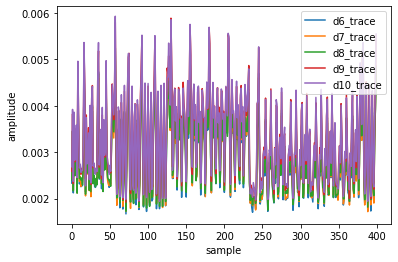

In [73]:
Traces_1 = np.load('0511_trace_first/D6/original_data/all__0.npy')        #new
#Traces_1 = Traces_1[:,[i for i in range(126,236)]]   #the 110 points related to the sbox operation (last round)
#Traces_1 = Traces_1[:,[i for i in range(200,310)]]    #the 110 points related to the sbox operation (first round)
print(np.mean(Traces_1))
plt.plot(np.mean(Traces_1,axis=0),label='d6_trace')


Traces_2 = np.load('0511_trace_first/D7/original_data/all__0.npy')
#Traces_2 = np.load('0511_trace_last/cpss_trace/5k_device7_15m/original_data/all__2.npy')
#Traces_2 = Traces_2[:,[i for i in range(126,236)]]   #the 110 points related to the sbox operation (last round)
#Traces_2 = Traces_2[:,[i for i in range(200,310)]]    #the 110 points related to the sbox operation (first round)
print(np.mean(Traces_2))
plt.plot(np.mean(Traces_2,axis=0),label='d7_trace')


Traces_3 = np.load('0511_trace_first/D8/original_data/all__0.npy')
#Traces_3= np.load('0511_trace_last/cpss_trace/5k_device7_15m/original_data/all__2.npy')
#Traces_3= Traces_3[:,[i for i in range(126,236)]]   #the 110 points related to the sbox operation (last round)
#Traces_3= Traces_3[:,[i for i in range(200,310)]]    #the 110 points related to the sbox operation (first round)
print(np.mean(Traces_3))
plt.plot(np.mean(Traces_3,axis=0),label='d8_trace')



Traces_4 = np.load('0511_trace_first/D9/original_data/all__0.npy')
#Traces_4 = np.load('0511_trace_last/cpss_trace/5k_device7_15m/original_data/all__2.npy')
#Traces_4 = Traces_4[:,[i for i in range(126,236)]]   #the 110 points related to the sbox operation (last round)
#Traces_4 = Traces_4[:,[i for i in range(200,310)]]    #the 110 points related to the sbox operation (first round)
print(np.mean(Traces_4))
plt.plot(np.mean(Traces_4,axis=0),label='d9_trace')


Traces_5 = np.load('0511_trace_first/D10/original_data/all__0.npy')
#Traces_5 = np.load('0511_trace_last/cpss_trace/5k_device7_15m/original_data/all__2.npy')
#Traces_5 = Traces_5[:,[i for i in range(126,236)]]   #the 110 points related to the sbox operation (last round)
#Traces_5 = Traces_5[:,[i for i in range(200,310)]]    #the 110 points related to the sbox operation (first round)
print(np.mean(Traces_5))
plt.plot(np.mean(Traces_5,axis=0),label='d10_trace')


plt.legend()
plt.xlabel('sample')
plt.ylabel('amplitude')
plt.savefig('new_first_compare.png',dpi=500)





0.0057226815
0.0052624145
0.005283239
0.005827754
0.005733803


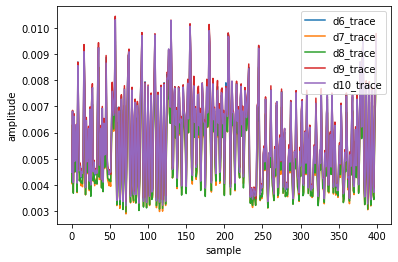

In [71]:
Traces_1 = np.load('0511_trace_first/ashes_trace/15m/5k_device6_15m/original_data/all__0.npy')         #old
#Traces_1 = Traces_1[:,[i for i in range(126,236)]]   #the 110 points related to the sbox operation (last round)
print(np.mean(Traces_1))
plt.plot(np.mean(Traces_1,axis=0),label='d6_trace')


Traces_2 = np.load('0511_trace_first/ashes_trace/15m/5k_device7_15m/original_data/all__0.npy')         #old
#Traces_2 = Traces_2[:,[i for i in range(126,236)]]   #the 110 points related to the sbox operation (last round)
print(np.mean(Traces_2))
plt.plot(np.mean(Traces_2,axis=0),label='d7_trace')



Traces_3 = np.load('0511_trace_first/ashes_trace/15m/5k_device8_15m/original_data/all__0.npy')         #old
#Traces_3 = Traces_3[:,[i for i in range(126,236)]]   #the 110 points related to the sbox operation (last round)
print(np.mean(Traces_3))
plt.plot(np.mean(Traces_3,axis=0),label='d8_trace')



Traces_4 = np.load('0511_trace_first/ashes_trace/15m/5k_device9_15m/original_data/all__0.npy')         #old
#Traces_4 = Traces_4[:,[i for i in range(126,236)]]   #the 110 points related to the sbox operation (last round)
print(np.mean(Traces_4))
plt.plot(np.mean(Traces_4,axis=0),label='d9_trace')



Traces_5 = np.load('0511_trace_first/ashes_trace/15m/5k_device10_15m/original_data/all__0.npy')         #old
#Traces_5 = Traces_5[:,[i for i in range(126,236)]]   #the 110 points related to the sbox operation (last round)
print(np.mean(Traces_5))
plt.plot(np.mean(Traces_5,axis=0),label='d10_trace')



plt.legend()
plt.xlabel('sample')
plt.ylabel('amplitude')
plt.savefig('old_first_compare.png',dpi=500)

0.0032815898
0.002948302
0.0031407194
0.0029952808
0.0028803882


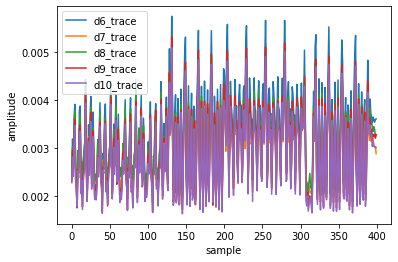

In [72]:
Traces_1 = np.load('0511_trace_last/D6/original_data/all__0.npy')        #new
#Traces_1 = Traces_1[:,[i for i in range(126,236)]]   #the 110 points related to the sbox operation (last round)
#Traces_1 = Traces_1[:,[i for i in range(200,310)]]    #the 110 points related to the sbox operation (first round)
print(np.mean(Traces_1))
plt.plot(np.mean(Traces_1,axis=0),label='d6_trace')


Traces_2 = np.load('0511_trace_last/D7/original_data/all__0.npy')
#Traces_2 = np.load('0511_trace_last/cpss_trace/5k_device7_15m/original_data/all__2.npy')
#Traces_2 = Traces_2[:,[i for i in range(126,236)]]   #the 110 points related to the sbox operation (last round)
#Traces_2 = Traces_2[:,[i for i in range(200,310)]]    #the 110 points related to the sbox operation (first round)
print(np.mean(Traces_2))
plt.plot(np.mean(Traces_2,axis=0),label='d7_trace')


Traces_3 = np.load('0511_trace_last/D8/original_data/all__0.npy')
#Traces_3= np.load('0511_trace_last/cpss_trace/5k_device7_15m/original_data/all__2.npy')
#Traces_3= Traces_3[:,[i for i in range(126,236)]]   #the 110 points related to the sbox operation (last round)
#Traces_3= Traces_3[:,[i for i in range(200,310)]]    #the 110 points related to the sbox operation (first round)
print(np.mean(Traces_3))
plt.plot(np.mean(Traces_3,axis=0),label='d8_trace')



Traces_4 = np.load('0511_trace_last/D9/original_data/all__0.npy')
#Traces_4 = np.load('0511_trace_last/cpss_trace/5k_device7_15m/original_data/all__2.npy')
#Traces_4 = Traces_4[:,[i for i in range(126,236)]]   #the 110 points related to the sbox operation (last round)
#Traces_4 = Traces_4[:,[i for i in range(200,310)]]    #the 110 points related to the sbox operation (first round)
print(np.mean(Traces_4))
plt.plot(np.mean(Traces_4,axis=0),label='d9_trace')


Traces_5 = np.load('0511_trace_last/D10/original_data/all__0.npy')
#Traces_5 = np.load('0511_trace_last/cpss_trace/5k_device7_15m/original_data/all__2.npy')
#Traces_5 = Traces_5[:,[i for i in range(126,236)]]   #the 110 points related to the sbox operation (last round)
#Traces_5 = Traces_5[:,[i for i in range(200,310)]]    #the 110 points related to the sbox operation (first round)
print(np.mean(Traces_5))
plt.plot(np.mean(Traces_5,axis=0),label='d10_trace')


plt.legend()
plt.xlabel('sample')
plt.ylabel('amplitude')
plt.savefig('new_last_compare.png',dpi=500)

0.0062896153
0.007046044
0.007261396
0.0072548296
0.0076767


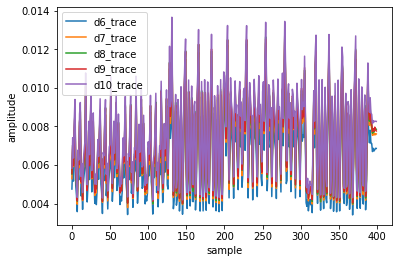

In [70]:
Traces_1 = np.load('0511_trace_last/cpss_trace/5k_device6_15m/original_data/all__0.npy')         #old
#Traces_1 = Traces_1[:,[i for i in range(200,310)]]   #the 110 points related to the sbox operation (last round)
print(np.mean(Traces_1))
plt.plot(np.mean(Traces_1,axis=0),label='d6_trace')


Traces_2 = np.load('0511_trace_last/cpss_trace/5k_device7_15m/original_data/all__0.npy')         #old
#Traces_2 = Traces_2[:,[i for i in range(200,310)]]   #the 110 points related to the sbox operation (last round)
print(np.mean(Traces_2))
plt.plot(np.mean(Traces_2,axis=0),label='d7_trace')



Traces_3 = np.load('0511_trace_last/cpss_trace/5k_device8_15m/original_data/all__0.npy')         #old
#Traces_3 = Traces_3[:,[i for i in range(200,310)]]  #the 110 points related to the sbox operation (last round)
print(np.mean(Traces_3))
plt.plot(np.mean(Traces_3,axis=0),label='d8_trace')



Traces_4 = np.load('0511_trace_last/cpss_trace/5k_device9_15m/original_data/all__0.npy')         #old
#Traces_4 = Traces_4[:,[i for i in range(200,310)]]   #the 110 points related to the sbox operation (last round)
print(np.mean(Traces_4))
plt.plot(np.mean(Traces_4,axis=0),label='d9_trace')



Traces_5 = np.load('0511_trace_last/cpss_trace/5k_device10_15m/original_data/all__0.npy')         #old
#Traces_5 = Traces_5[:,[i for i in range(200,310)]]   #the 110 points related to the sbox operation (last round)
print(np.mean(Traces_5))
plt.plot(np.mean(Traces_5,axis=0),label='d10_trace')



plt.legend()
plt.xlabel('sample')
plt.ylabel('amplitude')
plt.savefig('old_last_compare.png',dpi=500)

0.0076767
0.0052624145


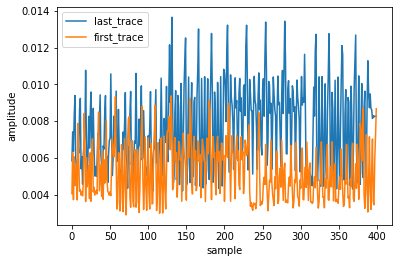

In [75]:
Traces_1 = np.load('0511_trace_last/cpss_trace/5k_device10_15m/original_data/all__0.npy')         #old
#Traces_1 = Traces_1[:,[i for i in range(200,310)]]   #the 110 points related to the sbox operation (last round)
print(np.mean(Traces_1))
plt.plot(np.mean(Traces_1,axis=0),label='last_trace')



Traces_2 = np.load('0511_trace_first/ashes_trace/15m/5k_device7_15m/original_data/all__0.npy')         #old
#Traces_2 = Traces_2[:,[i for i in range(126,236)]]   #the 110 points related to the sbox operation (last round)
print(np.mean(Traces_2))
plt.plot(np.mean(Traces_2,axis=0),label='first_trace')


plt.legend()
plt.xlabel('sample')
plt.ylabel('amplitude')
plt.savefig('old_first_vs_last_compare.png',dpi=500)

In [42]:
Traces_1 = np.load('0511_trace_first/D6/original_data/all__0.npy')
Traces_1 = Traces_1[:,[i for i in range(126,236)]]   #the 110 points related to the sbox operation (last round)
#Traces_1 = Traces_1[:,[i for i in range(200,310)]]    #the 110 points related to the sbox operation (first round)

print(np.mean(Traces_1))


Traces_2 = np.load('0511_trace_first/D7/original_data/all__0.npy')
#Traces_2 = np.load('0511_trace_last/cpss_trace/5k_device7_15m/original_data/all__2.npy')
Traces_2 = Traces_2[:,[i for i in range(126,236)]]   #the 110 points related to the sbox operation (last round)
#Traces_2 = Traces_2[:,[i for i in range(200,310)]]    #the 110 points related to the sbox operation (first round)
print(np.mean(Traces_2))


Traces_3 = np.load('0511_trace_first/D8/original_data/all__0.npy')
#Traces_3= np.load('0511_trace_last/cpss_trace/5k_device7_15m/original_data/all__2.npy')
Traces_3= Traces_3[:,[i for i in range(126,236)]]   #the 110 points related to the sbox operation (last round)
#Traces_3= Traces_3[:,[i for i in range(200,310)]]    #the 110 points related to the sbox operation (first round)
print(np.mean(Traces_3))



Traces_4 = np.load('0511_trace_first/D9/original_data/all__0.npy')
#Traces_4 = np.load('0511_trace_last/cpss_trace/5k_device7_15m/original_data/all__2.npy')
Traces_4 = Traces_4[:,[i for i in range(126,236)]]   #the 110 points related to the sbox operation (last round)
#Traces_4 = Traces_4[:,[i for i in range(200,310)]]    #the 110 points related to the sbox operation (first round)
print(np.mean(Traces_4))


Traces_5 = np.load('0511_trace_first/D10/original_data/all__0.npy')
#Traces_5 = np.load('0511_trace_last/cpss_trace/5k_device7_15m/original_data/all__2.npy')
Traces_5 = Traces_5[:,[i for i in range(126,236)]]   #the 110 points related to the sbox operation (last round)
#Traces_5 = Traces_5[:,[i for i in range(200,310)]]    #the 110 points related to the sbox operation (first round)
print(np.mean(Traces_5))

0.0033249836
0.0033922843
0.003368108
0.0037725873
0.0037863823


In [41]:
print(np.mean(Traces_1))

0.0033249836
